In [18]:
import random
import string
import numpy as np
import pandas as pd
import os
import sys
import subprocess
import matplotlib.pyplot as plt
import re

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.despine()
sns.set(rc={'figure.figsize':(14,8)})
plt.style.use('seaborn-whitegrid')

import RNA
from helper import print_moves

<Figure size 1008x576 with 0 Axes>

eval_move_newlocal_min_200_multiple_sections_min10.csv

<AxesSubplot:xlabel='sequence_length', ylabel='runtime'>

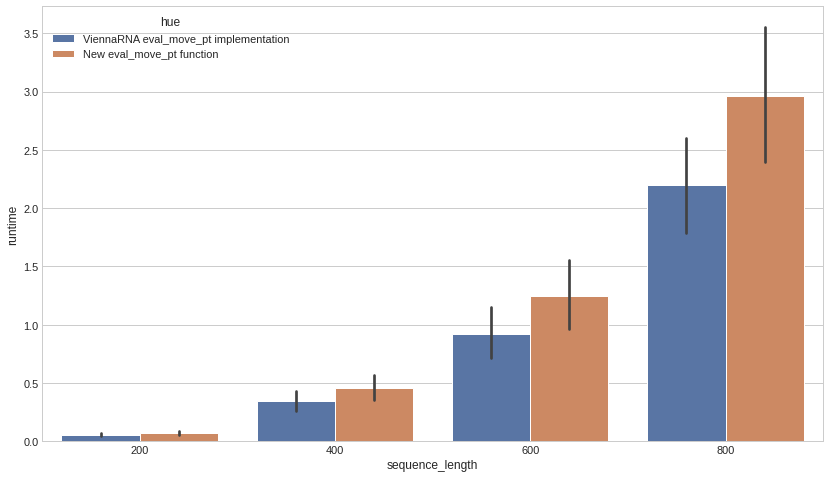

In [21]:
# hashing effect

# barrier shift
prefix = "./results/"
filenames = [
             "eval_move_new_local_min_200_multiple_sections_min10.csv",
             "eval_move_new_local_min_400_multiple_sections_min10.csv",
             "eval_move_new_local_min_600_multiple_sections_min10.csv",
             "eval_move_new_local_min_800_multiple_sections_min10.csv",
             ]

filenames2 = [
             "eval_move_regular_local_min_200_multiple_sections_min10.csv",
             "eval_move_regular_local_min_400_multiple_sections_min10.csv",
             "eval_move_regular_local_min_600_multiple_sections_min10.csv",
             "eval_move_regular_local_min_800_multiple_sections_min10.csv",
             ]

subplots = len(filenames)

df = pd.DataFrame()

for i, (f1, f2) in enumerate(zip(filenames, filenames2)):

    c_df = pd.read_csv(prefix+f2)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_fp_runtimes"]
    c_df["hue"] = "ViennaRNA eval_move_pt implementation" 
    df = pd.concat(frames)   

    c_df = pd.read_csv(prefix+f1)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_fp_runtimes"]
    c_df["hue"] = "New eval_move_pt function" 
    df = pd.concat(frames)    

   

sns.barplot(y="runtime", x="sequence_length", hue="hue", data=df)